***Data sets description and problem analyzed***

In many urban cities, rental bikes have become an essential part of enhancing mobility and convenience. Ensuring that rental bikes are available and accessible at the right time is critical to minimizing wait times and meeting demand efficiently. This requires accurate prediction of the hourly demand for rental bikes to maintain a stable supply and provide a seamless experience for users. Addressing this challenge is vital for optimizing the allocation and distribution of bikes throughout the city.

**Problem Analyzed**

The goal of this project is to predict the number of bikes rented per hour using various machine learning techniques. This involves identifying relationships between weather, time, and other variables with bike rental counts and assessing the performance of different models.


**Data Understandin**

The dataset includes:

Target Variable: Number of bikes rented per hour.

Features:

Weather Data: Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar Radiation, Snowfall, Rainfall.

Date-Time Data: Hour, Day, Month, Year, Weekday, Holiday/Working day.

Added data: feat01, feat02, feat03, feat04, feat05, feat06, feat07, feat08,feat10

Size: Approximately 11,680 rows and 24 columns.


In [ ]:
type

In [121]:
import pandas as pd
# Define the data
data = {
    "Parameters/Features": [
        "Date", "Dew point temperature", "feature 01-10",  "Functioning Day",
        "Holiday", "Hour", "Humidity",  "Rented Bike count", "Seasons", 
        "Solar Radiation", "Temperature", "Visibility", "Wind speed","Rainfall", "Snowfall"
    ],
    "Abbreviation": [
        "Date", "Dew point temperature", "feat01-10", "Functioning Day", "Holiday", "Hour", "Humidity",
         "Rented Bike Count", "Seasons",  "Solar radiation", "Temperature",
        "Visibility", "Wind speed","Rainfall", "Snowfall"
    ],
    "Type": [
        "datetime64[ns]", "Continuous", "Continuous",  "Categorical", "Categorical",
        "Continuous", "Continuous",  "Continuous", "Categorical", 
        "Continuous", "Continuous", "Continuous", "Continuous", "Continuous", "Continuous"
    ],
    "Measurement": [
        "1=2018, 0=2017", "°C", "", "0=NoFunc, 1=Func", "1=Holiday, 0=No holiday",
        "0, 1, 2, ..., 23", "%",  "0, 1, 2, ..., 3556", "3=Autumn, 1=Spring, 2=Summer, 4=Winter",
         "MJ/m²", "°C", "10 m", "m/s", "Mm", "cm"
    ]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Style the table
styled_df = df.style.set_table_styles(
    [
        {"selector": "thead th", "props": [("background-color", "#48AAAD"), ("color", "white"), ("font-weight", "bold")]},
        {"selector": "tbody td", "props": [("text-align", "center")]},
        {"selector": "table", "props": [("border", "1px solid black"), ("border-collapse", "collapse"), ("width", "100%")]}
    ]
).set_properties(**{"border": "1px solid black", "padding": "5px"})

styled_df


,Parameters/Features,Abbreviation,Type,Measurement
0,Date,Date,datetime64[ns],"1=2018, 0=2017"
1,Dew point temperature,Dew point temperature,Continuous,°C
2,feature 01-10,feat01-10,Continuous,
3,Functioning Day,Functioning Day,Categorical,"0=NoFunc, 1=Func"
4,Holiday,Holiday,Categorical,"1=Holiday, 0=No holiday"
5,Hour,Hour,Continuous,"0, 1, 2, ..., 23"
6,Humidity,Humidity,Continuous,%
7,Rented Bike count,Rented Bike Count,Continuous,"0, 1, 2, ..., 3556"
8,Seasons,Seasons,Categorical,"3=Autumn, 1=Spring, 2=Summer, 4=Winter"
9,Solar Radiation,Solar radiation,Continuous,MJ/m²


This table provides a structured overview of the dataset's features, including their abbreviations, data types, and measurement units or value ranges. Here's what each column represents:

**Features**: The names of the features in the dataset.

**Abbreviation**: A shortened or standardized form of the feature names.

**Type**: Indicates whether the data is categorical, continuous, or datetime.

**Measurement**: Describes the units of measurement or specific coding for categorical features.

*** Loading Required Packages***

In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from io import StringIO
from sklearn.preprocessing import MinMaxScaler
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np


***Brief Explanation of the Libraries:***

**1. Pandas:** For data manipulation and analysis, particularly working with DataFrames.

**2. Seaborn & Matplotlib:** For data visualization, used to create plots and charts.

**3. Scikit-learn:** A comprehensive library for machine learning that provides tools for data preprocessing, modeling, evaluation, and more. You’re using it for:

  **. Preprocessing:** MinMaxScaler for feature scaling.

  **. Models:** RandomForestRegressor, DecisionTreeRegressor, BaggingRegressor, GradientBoostingRegressor for regression tasks.

  **. Evaluation:** Metrics like mean_squared_error, r2_score, and mean_absolute_error to assess model performance.

  **. Model Selection:** train_test_split for splitting data, GridSearchCV for hyperparameter tuning.

**4. Boruta:** A feature selection method used to identify important features.

**5. TensorFlow (Keras):** For building and training neural network models (Sequential, Dense, and Adam optimizer).

**6. Numpy:** For numerical operations, especially with arrays.

This set of imports provides a solid foundation for data preprocessing, model training, evaluation, and optimization for machine learning tasks

***Data Loading and Exploration**

In [123]:
Data = pd.read_csv('r4.csv')

In [124]:
Data.head()

,id,Date,Dew point temperature,feat01,feat02,feat03,feat04,feat05,feat06,feat07,...,Hour,Humidity,Rainfall,Rented Bike Count,Seasons,Snowfall,Solar Radiation,Temperature,Visibility,Wind speed
0,1,08/11/2018,8.8,0.585382,0.026140,0.920350,0.315114,0.977342,0.169791,0.656922,...,8,89,0.0,148,Autumn,0.0,0.02,10.6,689,1.5
1,2,26/09/2018,8.9,0.730931,0.066437,0.349515,0.456733,0.822811,0.471541,0.424646,...,7,62,0.0,335,Autumn,0.0,0.01,16.3,2000,2.0
2,3,12/01/2018,-18.5,0.826907,0.325077,0.772166,0.918194,0.994359,0.239573,0.535647,...,22,39,0.0,186,Winter,0.0,0.00,-6.9,2000,1.6
3,4,26/07/2018,24.8,0.115778,0.793062,0.259372,0.797660,0.109027,0.657459,0.522908,...,21,74,0.0,1868,Summer,0.0,0.00,30.0,1056,2.7
4,5,26/05/2018,9.1,0.319288,0.842444,0.001954,0.976224,0.898576,0.036342,0.525282,...,13,31,0.0,1441,Spring,0.0,3.29,27.8,1326,2.0


In [125]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11680 entries, 0 to 11679
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     11680 non-null  int64  
 1   Date                   11680 non-null  object 
 2   Dew point temperature  11680 non-null  float64
 3   feat01                 11680 non-null  float64
 4   feat02                 11680 non-null  float64
 5   feat03                 11680 non-null  float64
 6   feat04                 11680 non-null  float64
 7   feat05                 11680 non-null  float64
 8   feat06                 11680 non-null  float64
 9   feat07                 11680 non-null  float64
 10  feat08                 11680 non-null  float64
 11  feat10                 11680 non-null  float64
 12  Functioning Day        11680 non-null  object 
 13  Holiday                11680 non-null  object 
 14  Hour                   11680 non-null  int64  
 15  Hu



The dataset contains 11,680 entries and 24 columns. Here's a breakdown of the data:

- **Data Types**:
  - **int64**: Columns like `id`, `Hour`, `Humidity`, `Rented Bike Count`, `Visibility` have integer values.
  - **float64**: Several columns, including `Dew point temperature`, `Rainfall`, `Snowfall`, and others, contain floating-point values.
  - **object**: Categorical columns like `Date`, `Functioning Day`, `Holiday`, and `Seasons` contain string values.

- **Non-Null Counts**: All columns have 11,680 non-null entries, meaning there are no missing values in the dataset.



In [126]:
Data.describe()

,id,Dew point temperature,feat01,feat02,feat03,feat04,feat05,feat06,feat07,feat08,feat10,Hour,Humidity,Rainfall,Rented Bike Count,Snowfall,Solar Radiation,Temperature,Visibility,Wind speed
count,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000
mean,5840.500000,0.752046,0.501512,0.491890,0.495178,0.503874,0.501122,0.504344,0.506352,0.477377,0.497148,11.494521,56.734589,0.121995,603.504795,0.102072,0.520689,9.724161,1419.188356,1.773476
std,3371.869907,13.496679,0.289155,0.289140,0.288472,0.289598,0.289319,0.289384,0.124456,0.128627,0.287505,6.921425,20.432232,1.014351,600.096799,0.488215,0.823745,12.246182,619.962048,1.061456
min,1.000000,-30.600000,0.000060,0.000053,0.000041,0.000038,0.000313,0.000463,0.000000,0.000000,0.000126,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.800000,27.000000,0.000000
25%,2920.750000,-10.025000,0.247687,0.242200,0.245594,0.251301,0.253241,0.252874,0.424095,0.391367,0.250207,5.000000,40.000000,0.000000,168.000000,0.000000,0.000000,0.100000,896.000000,1.000000
50%,5840.500000,0.700000,0.500108,0.484624,0.489729,0.503993,0.502959,0.512171,0.507535,0.475609,0.498043,11.000000,55.000000,0.000000,365.000000,0.000000,0.000000,8.500000,1678.000000,1.600000
75%,8760.250000,11.525000,0.753892,0.740760,0.744242,0.756368,0.751092,0.752649,0.588661,0.563748,0.744266,17.000000,73.000000,0.000000,904.250000,0.000000,0.820000,20.000000,1998.000000,2.400000
max,11680.000000,27.200000,0.999985,0.999982,0.999993,0.999998,0.999842,0.999929,1.000000,1.000000,0.999875,23.000000,98.000000,35.000000,3556.000000,8.800000,3.520000,39.400000,2000.000000,7.400000


### **Summary Statistics**

The following provides a summary of the key statistics for each feature in the dataset:

- **count**: All columns have 11,680 non-null values, indicating no missing data.
- **mean**: The average value for each feature. For example, the average `Dew point temperature` is approximately 0.75, and the average `Rented Bike Count` is around 603.5.
- **std (Standard Deviation)**: A measure of how much each feature varies. For example, the `Dew point temperature` has a standard deviation of 13.5, indicating significant variation.
- **min**: The minimum value for each feature. For instance, the minimum `Dew point temperature` is -30.6, and the minimum `Rented Bike Count` is 0.
- **25%**: The value below which 25% of the data falls. For `Dew point temperature`, it's -10.03.
- **50% (Median)**: The middle value in the dataset, with half the values above and half below. For `Dew point temperature`, the median is 0.7.
- **75%**: The value below which 75% of the data falls. For `Dew point temperature`, it's 11.53.
- **max**: The maximum value for each feature. For example, the maximum `Dew point temperature` is 27.2, and the maximum `Rented Bike Count` is 3556.

This summary helps to quickly understand the distribution and range of values in each feature of the dataset.


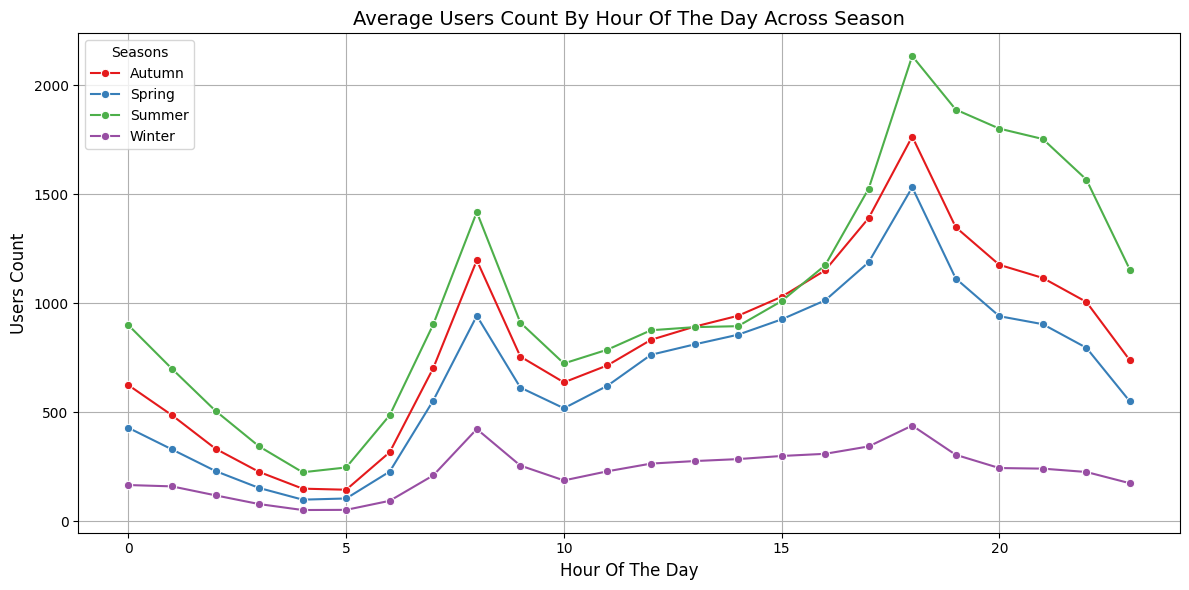

In [127]:


# Function to plot average users count by hour across seasons
def plot_average_users_by_hour_season(df, target, hour_col='Hour', season_col='Seasons'):
    """
    Plot average user count by hour of the day across seasons.
    Parameters:
    - df: DataFrame containing the data.
    - target: Name of the target variable column (e.g., Rented Bike Count).
    - hour_col: Name of the hour column.
    - season_col: Name of the season column.
    """
    
    # Aggregate the data
    aggregated_data = df.groupby([hour_col, season_col])[target].mean().reset_index()

    # Create the plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=aggregated_data,
        x=hour_col,
        y=target,
        hue=season_col,
        marker='o',
        palette='Set1'
    )

    # Customize the plot
    plt.title('Average Users Count By Hour Of The Day Across Season', fontsize=14)
    plt.xlabel('Hour Of The Day', fontsize=12)
    plt.ylabel('Users Count', fontsize=12)
    plt.legend(title='Seasons', fontsize=10, loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example call
plot_average_users_by_hour_season(Data, target='Rented Bike Count', hour_col='Hour', season_col='Seasons')


In [128]:
#changing the type of Date to the date format datetime64[ns]
Data['Date'] = pd.to_datetime(Data['Date'], format='%d/%m/%Y')
# from when untill when
print('Data collected from :', Data['Date'].min())
print('Data collected untill :', Data['Date'].max())
#extract the year
Data['year'] = Data['Date'].dt.year
Data['month'] = Data['Date'].dt.month

Data collected from : 2017-12-01 00:00:00
Data collected untill : 2018-11-30 00:00:00


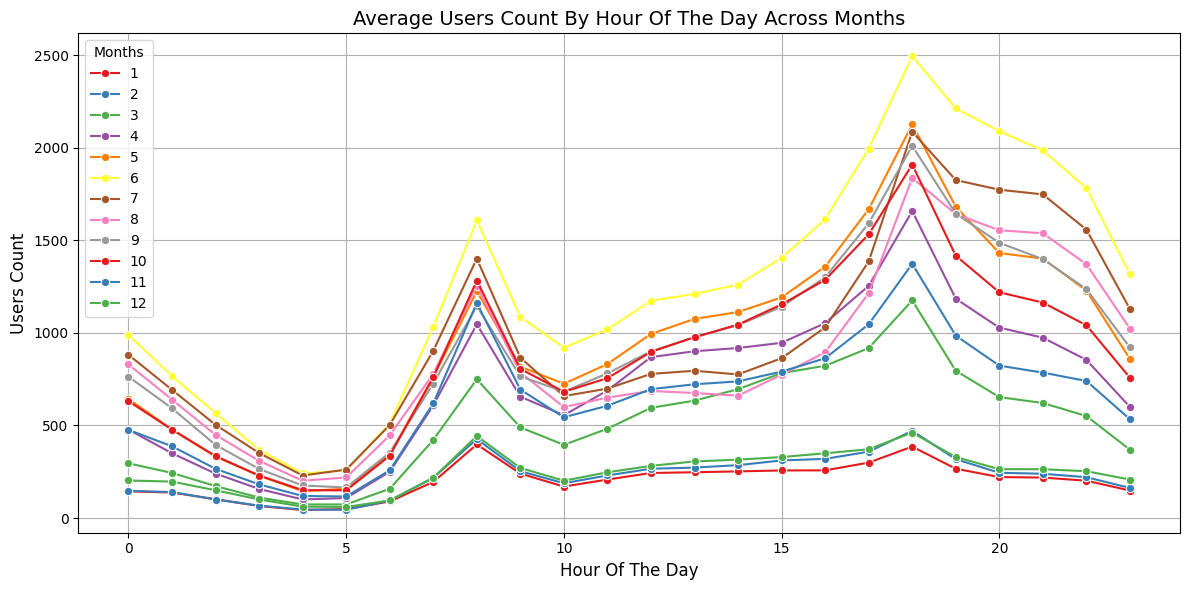

In [129]:


# Function to plot average users count by hour across months
def plot_average_users_by_hour_month(df, target, hour_col='Hour', month_col='month'):
    """
    Plot average user count by hour of the day across months.
    Parameters:
    - df: DataFrame containing the data.
    - target: Name of the target variable column (e.g., Rented Bike Count).
    - hour_col: Name of the hour column.
    - month_col: Name of the month column.
    """
    
    # Aggregate the data
    aggregated_data = df.groupby([hour_col, month_col])[target].mean().reset_index()

    # Create the plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=aggregated_data,
        x=hour_col,
        y=target,
        hue=month_col,
        marker='o',
        palette='Set1'
    )

    # Customize the plot
    plt.title('Average Users Count By Hour Of The Day Across Months', fontsize=14)
    plt.xlabel('Hour Of The Day', fontsize=12)
    plt.ylabel('Users Count', fontsize=12)
    plt.legend(title='Months', fontsize=10, loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example call
plot_average_users_by_hour_month(Data, target='Rented Bike Count', hour_col='Hour', month_col='month')


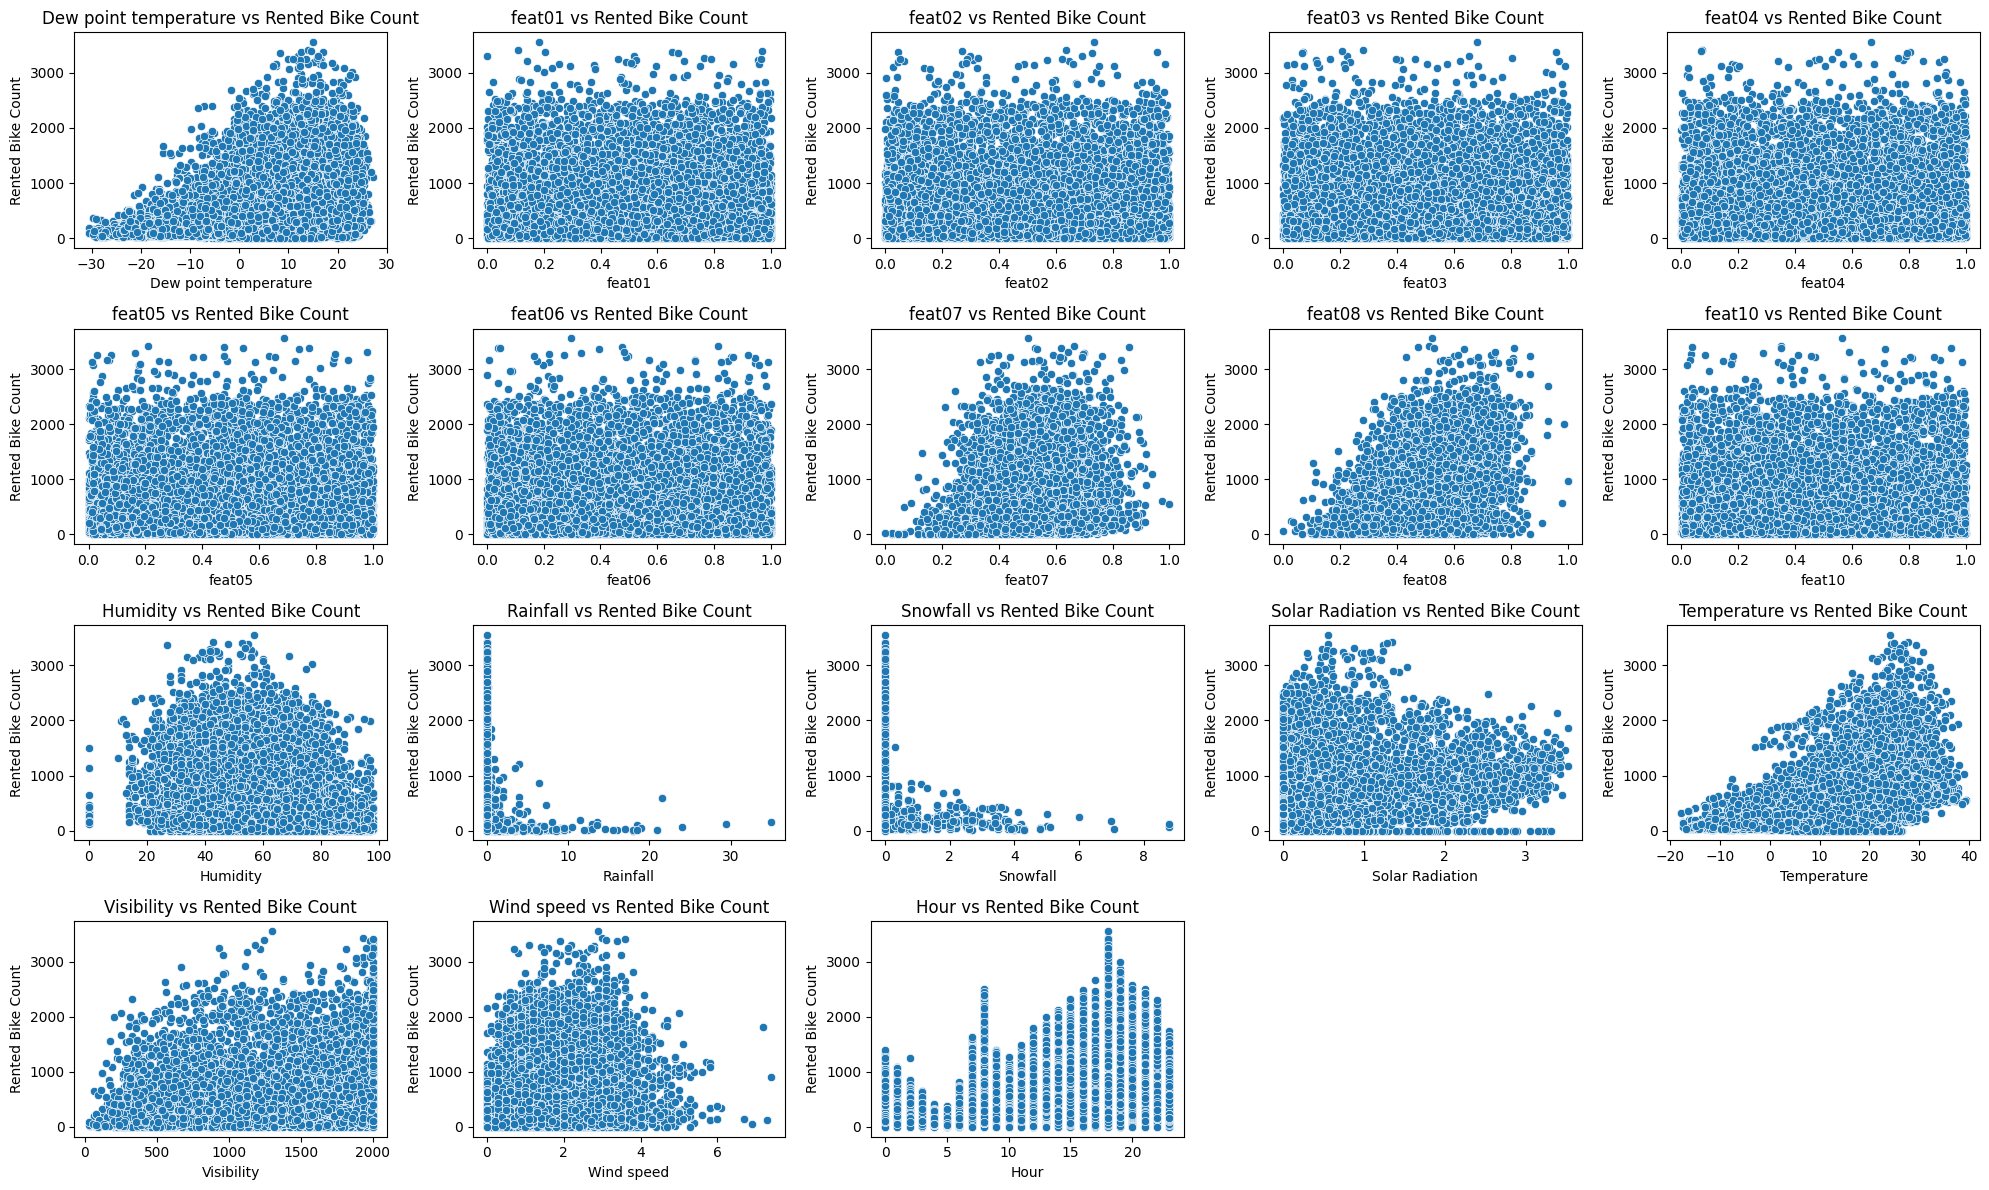

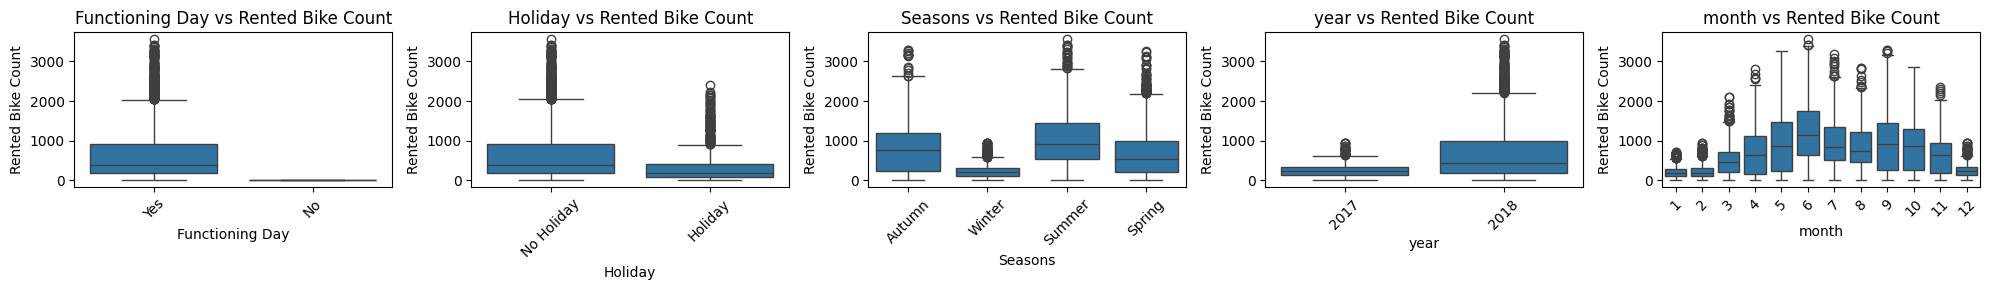

In [130]:

# Function to plot relationships in a grid layout
def plot_relationships_grid(df, target_variable):
    # Define features
    numerical_features = [
        "Dew point temperature", "feat01", "feat02", "feat03", "feat04",
        "feat05", "feat06", "feat07", "feat08", "feat10", "Humidity",
        "Rainfall", "Snowfall", "Solar Radiation", "Temperature",
        "Visibility", "Wind speed", "Hour"
    ]
    categorical_features = ["Functioning Day", "Holiday", "Seasons", 'year', 'month']

    # Set up grid for numerical features
    n_num = len(numerical_features)
    n_rows_num = (n_num + 4) // 5  # 4 rows, 5 columns
    fig_num, axes_num = plt.subplots(n_rows_num, 5, figsize=(20, n_rows_num * 3))
    axes_num = axes_num.flatten()

    for i, feature in enumerate(numerical_features):
        if feature in df.columns:  # Check if feature exists
            sns.scatterplot(x=feature, y=target_variable, data=df, ax=axes_num[i])
            axes_num[i].set_title(f'{feature} vs {target_variable}')
            axes_num[i].set_xlabel(feature)
            axes_num[i].set_ylabel(target_variable)

    # Hide unused axes
    for j in range(i + 1, len(axes_num)):
        fig_num.delaxes(axes_num[j])

    plt.tight_layout()
    plt.show()

    # Set up grid for categorical features
    n_cat = len(categorical_features)
    n_rows_cat = (n_cat + 4) // 5  # Adjust rows for fewer categorical features
    fig_cat, axes_cat = plt.subplots(n_rows_cat, 5, figsize=(20, n_rows_cat * 3))
    axes_cat = axes_cat.flatten()

    for i, feature in enumerate(categorical_features):
        if feature in df.columns:  # Check if feature exists
            sns.boxplot(x=feature, y=target_variable, data=df, ax=axes_cat[i])
            axes_cat[i].set_title(f'{feature} vs {target_variable}')
            axes_cat[i].set_xlabel(feature)
            axes_cat[i].set_ylabel(target_variable)
            axes_cat[i].tick_params(axis='x', rotation=45)

    # Hide unused axes
    for j in range(i + 1, len(axes_cat)):
        fig_cat.delaxes(axes_cat[j])

    plt.tight_layout()
    plt.show()

# Call the function
#plot_relationships_grid(X_train.assign(target=y_train), "target")
plot_relationships_grid(Data, 'Rented Bike Count')


Step 2: Preprocessing

In [131]:
Data = Data.drop(columns=['id'])

In [132]:
Data.value_counts('Rainfall')

Rainfall
0.0     11088
0.5       125
1.0        68
1.5        59
0.1        54
        ...  
4.9         1
1.2         1
1.3         1
2.4         1
35.0        1
Name: count, Length: 61, dtype: int64

In [133]:
Data.value_counts('Snowfall')

Snowfall
0.0    10845
1.0       78
0.3       75
0.5       68
0.9       68
0.7       62
2.0       44
0.8       43
1.6       38
0.4       35
2.2       35
0.6       30
0.2       29
3.5       26
2.6       23
1.2       16
2.5       15
2.7       12
1.8        9
3.0        8
4.1        7
4.0        7
3.7        6
3.2        6
3.8        6
1.7        6
2.1        6
1.9        6
1.3        6
1.1        5
2.4        5
2.3        5
3.9        4
4.3        4
4.8        4
3.4        4
3.3        4
0.1        4
1.4        4
2.8        3
5.0        3
3.1        2
2.9        2
4.2        2
1.5        2
5.1        2
8.8        2
3.6        1
6.0        1
7.0        1
7.1        1
Name: count, dtype: int64

In [134]:
Data.value_counts('Date')

Date
2017-12-01    48
2018-01-31    48
2018-02-28    48
2018-02-27    48
2018-02-26    48
              ..
2018-06-25    24
2018-06-26    24
2018-06-27    24
2018-06-28    24
2018-11-30    24
Name: count, Length: 365, dtype: int64

In [135]:
Data.value_counts('year')

year
2018    10192
2017     1488
Name: count, dtype: int64

In [136]:
year_mapping={2018 :1, 2017 :0}
Data['year']=Data['year'].map(year_mapping)

In [137]:
Data.value_counts('year')

year
1    10192
0     1488
Name: count, dtype: int64

In [138]:

Data.value_counts('month')

month
1     1488
3     1488
12    1488
2     1344
5      744
7      744
8      744
10     744
4      736
6      720
9      720
11     720
Name: count, dtype: int64

In [139]:
Data = Data.drop(columns=['Date'])

In [140]:
Data.value_counts('Seasons')

Seasons
Winter    4320
Spring    2968
Summer    2208
Autumn    2184
Name: count, dtype: int64

In [141]:
# Define the mapping of numbers to seasons
season_mapping = {'Spring': 1, 'Summer':2,  'Autumn':3,'Winter':4}

# Apply the mapping using map
Data['Seasons'] = Data['Seasons'].map(season_mapping)


In [142]:
Data.value_counts('Seasons')

Seasons
4    4320
1    2968
2    2208
3    2184
Name: count, dtype: int64

In [143]:
Data.value_counts('Holiday')

Holiday
No Holiday    11032
Holiday         648
Name: count, dtype: int64

In [144]:
holiday_mapping={'No Holiday':0, 'Holiday':1}
Data['Holiday'] = Data['Holiday'].map(holiday_mapping)

In [145]:
Data.value_counts('Holiday')

Holiday
0    11032
1      648
Name: count, dtype: int64

In [146]:
Data.value_counts('Functioning Day')

Functioning Day
Yes    11385
No       295
Name: count, dtype: int64

In [147]:
func_mapping={'No':0, 'Yes':1}
Data['Functioning Day'] = Data['Functioning Day'].map(func_mapping)

In [148]:
Data.value_counts('Functioning Day')

Functioning Day
1    11385
0      295
Name: count, dtype: int64

In [149]:


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select columns to scale (excluding 'Rented Bike Count' and 'Hour')
columns_to_scale = Data.select_dtypes(include=['float64', 'int64']).columns.difference(['Hour', 'Functioning Day', 'year', 'month', 'Holiday', 'Seasons', 'Rented Bike Count'])

# Apply MinMax scaling to the selected columns
Data[columns_to_scale] = scaler.fit_transform(Data[columns_to_scale])

# Create a new DataFrame with the scaled values
#scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Combine the scaled data with the non-scaled columns
#final_df = pd.concat([Data[['Rented Bike Count', 'Hour']], scaled_df], axis=1)





In [150]:
Data.head()

,Dew point temperature,feat01,feat02,feat03,feat04,feat05,feat06,feat07,feat08,feat10,...,Rainfall,Rented Bike Count,Seasons,Snowfall,Solar Radiation,Temperature,Visibility,Wind speed,year,month
0,0.681661,0.585366,0.026089,0.920352,0.315089,0.977490,0.169418,0.656922,0.424366,0.094350,...,0.0,148,3,0.0,0.005682,0.496503,0.335530,0.202703,1,11
1,0.683391,0.730925,0.066389,0.349491,0.456714,0.822886,0.471329,0.424646,0.382840,0.265212,...,0.0,335,3,0.0,0.002841,0.596154,1.000000,0.270270,1,9
2,0.209343,0.826909,0.325048,0.772162,0.918193,0.994515,0.239237,0.535647,0.559941,0.521049,...,0.0,186,4,0.0,0.000000,0.190559,1.000000,0.216216,1,1
3,0.958478,0.115726,0.793066,0.259343,0.797654,0.108765,0.657347,0.522908,0.681320,0.857901,...,0.0,1868,2,0.0,0.000000,0.835664,0.521541,0.364865,1,7
4,0.686851,0.319252,0.842451,0.001913,0.976225,0.898687,0.035898,0.525282,0.674364,0.198284,...,0.0,1441,1,0.0,0.934659,0.797203,0.658388,0.270270,1,5


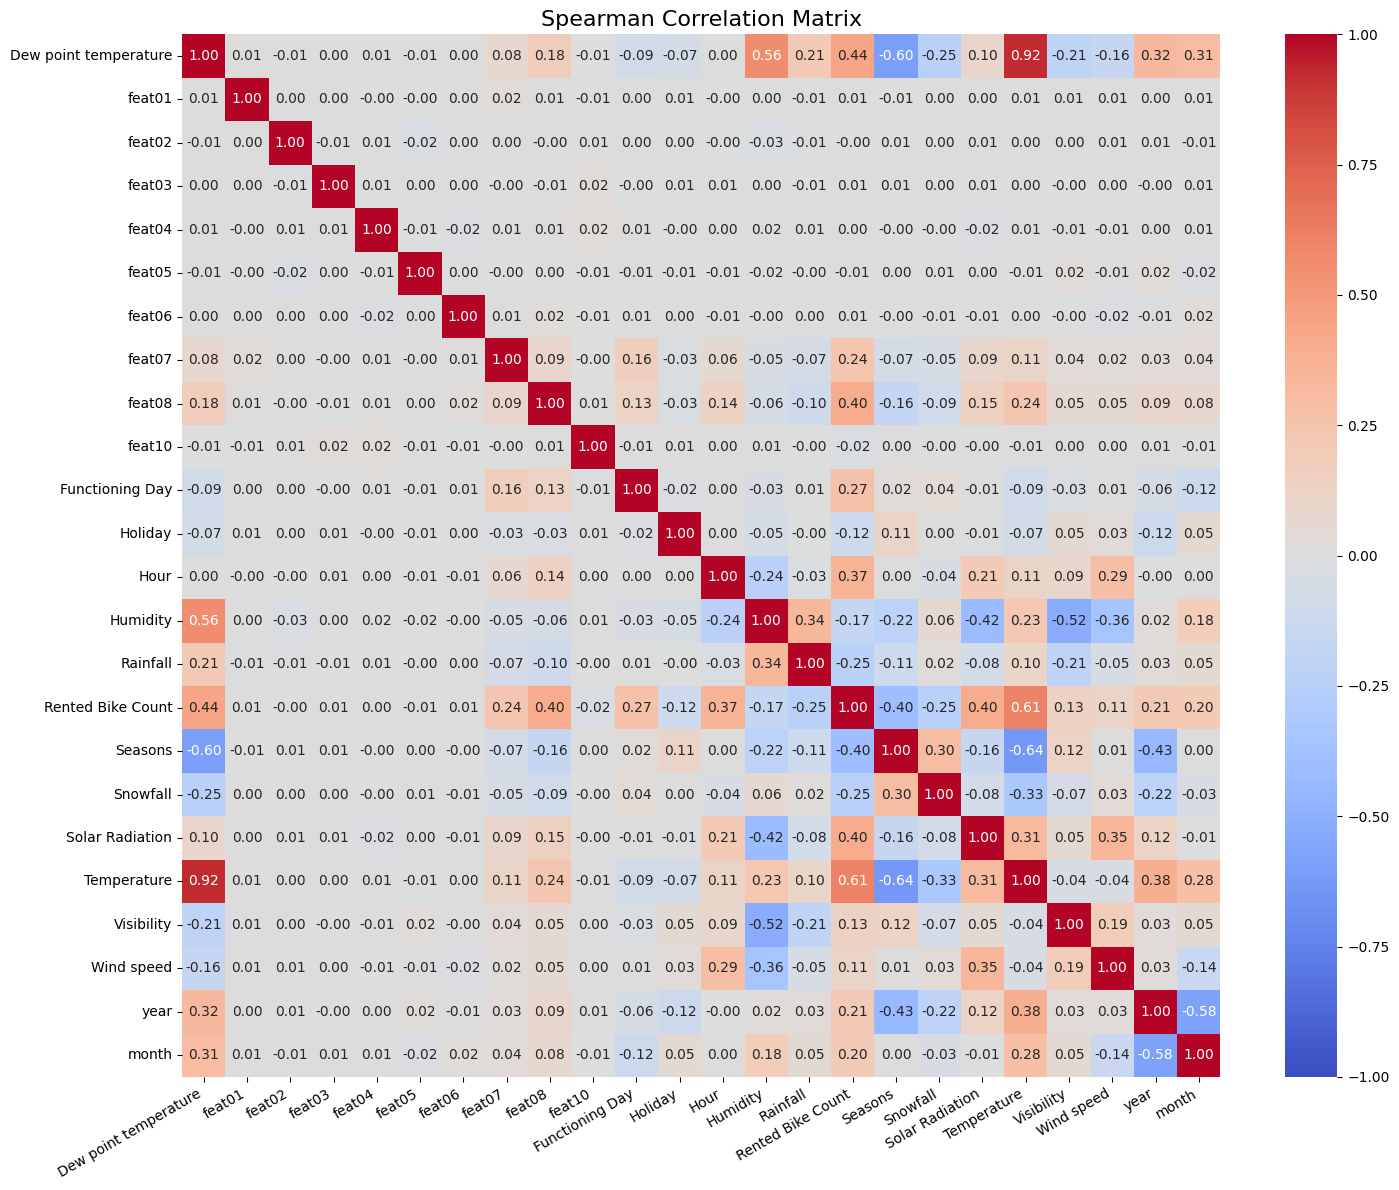

In [151]:


# Function to plot the correlation heatmap
def plot_correlation_matrix(df, method='pearson'):
    """
    Plot a heatmap of the correlation matrix with numbers.
    Parameters:
    - df: DataFrame containing the dataset.
    - method: Correlation method ('pearson', 'spearman', 'kendall').
    """
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['number'])

    # Compute correlation matrix
    corr_matrix = numeric_df.corr(method=method)

    # Create the heatmap
    plt.figure(figsize=(15, 12))  # Adjust figure size for better visualization
    sns.heatmap(
        corr_matrix,
        annot=True,  # Display correlation values
        fmt=".2f",   # Format for the numbers
        cmap="coolwarm",  # Color palette
        cbar=True,    # Show color bar
        vmin=-1, vmax=1  # Range of correlation values
    )
    plt.title(f'{method.capitalize()} Correlation Matrix', fontsize=16)
    
    # Adjust x-ticks and y-ticks
    plt.xticks(fontsize=10, rotation=30, ha='right')  # Rotate x-ticks with alignment
    plt.yticks(fontsize=10, rotation=0)  # Keep y-ticks horizontal

    plt.tight_layout()
    plt.show()

# Example call with a DataFrame `Data`:
plot_correlation_matrix(Data, method='spearman')


The heatmap above visualizes the correlation between "Rented Bike Count" and the selected features. Here are the most significant correlations:

Positive Correlations: Temperature: Strong positive correlation (0.61). Dew point temperature: Moderate positive correlation (0.44). Solar Radiation: Moderate positive correlation (0.40). Hour: Moderate positive correlation (0.37). feat08: Moderate positive correlation (0.40). Negative Correlations: Snowfall: Moderate negative correlation (-0.25). Rainfall: Moderate negative correlation (-0.25). Humidity: Weak negative correlation (-0.17). Insights: Weather-related features like temperature and solar radiation have a strong impact on bike rentals. Adverse weather conditions (snowfall, rainfall, and humidity) negatively affect bike rentals. The time of day (hour) also plays a significant role, indicating higher rentals during certain periods.

**Step 3: Apply Boruta**

The **Boruta algorithm** is a feature selection method designed to identify all relevant variables for a predictive model. It is built on the Random Forest algorithm and operates as a wrapper method, comparing the importance of real features with that of "shadow features," which are randomly shuffled copies of the original variables. This ensures a robust evaluation of feature relevance. Boruta iteratively evaluates the importance of each feature and assigns one of three outcomes: confirmed (important), tentative (possibly important), or rejected (not important). By filtering out irrelevant variables, the algorithm reduces model complexity, enhances interpretability, and can improve prediction performance. It is particularly useful in high-dimensional datasets and is often used before splitting data into training and testing sets to ensure consistent feature selection.

In [152]:


# Define features (X) and target (y)
X = Data.drop(columns=['Rented Bike Count'])
y = Data['Rented Bike Count']

# Initialize Random Forest
rf = RandomForestRegressor(n_jobs=-1, random_state=42)

# Initialize Boruta
boruta = BorutaPy(estimator=rf, n_estimators='auto', random_state=42)

# Fit Boruta
boruta.fit(X.values, y.values)

# Get the selected features
selected_features = X.columns[boruta.support_]
print("Selected Features by Boruta:")
print(selected_features)


Selected Features by Boruta:
Index(['Dew point temperature', 'feat07', 'feat08', 'Functioning Day', 'Hour',
       'Humidity', 'Rainfall', 'Seasons', 'Solar Radiation', 'Temperature',
       'Visibility', 'Wind speed', 'month'],
      dtype='object')


Step 4: Split the Data

In [153]:



# Define features (X) and target variable (y)
x=Data[['Dew point temperature', 'feat07', 'feat08', 'Functioning Day', 'Hour',
       'Humidity', 'Rainfall', 'Seasons', 'Solar Radiation', 'Temperature',
       'Visibility', 'Wind speed', 'month']]
#X = Data.drop(columns=['Rented Bike Count'])  # Drop the target column
y = Data['Rented Bike Count']  # Target column
# Replace spaces with underscores in column names
X.columns = X.columns.str.replace(' ', '_')

# Split the data: 75% for training, 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display dimensions of the training and testing sets
print(f"Training set dimensions (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"Testing set dimensions (X_test, y_test): {X_test.shape}, {y_test.shape}")


Training set dimensions (X_train, y_train): (8760, 23), (8760,)
Testing set dimensions (X_test, y_test): (2920, 23), (2920,)


# *Step 5: Model Building and Evaluation*

## **Evaluation Metrics**
In regression analysis, evaluating the performance of a model is crucial to understanding how well it predicts the target variable. I have chosen the following metrics to assess the accuracy and reliability of the regression model:

### **1. Root Mean Squared Error (RMSE)**
- RMSE measures the square root of the average squared differences between the predicted and actual values.
- It provides an indication of how much error the model typically makes in its predictions, with larger errors penalized more heavily than smaller ones.
- **Why chosen?** RMSE is widely used for its interpretability and sensitivity to large errors, making it ideal for applications where significant deviations are critical.

### **2. Mean Absolute Error (MAE)**
- MAE calculates the average of the absolute differences between predicted and actual values.
- Unlike RMSE, it treats all errors equally, without giving extra weight to larger deviations.
- **Why chosen?** MAE offers a straightforward measure of the average prediction error, making it easy to understand and interpret.

### **3. Mean Absolute Percentage Error (MAPE)**
- MAPE represents the error as a percentage of the actual values, providing a relative measure of prediction accuracy.
- It is especially useful when dealing with data where understanding the scale of errors relative to the target variable is important.
- **Why chosen?** MAPE enables comparison of model performance across datasets with different scales, making it a versatile metric.

### **4. R-squared (R²)**
- R² measures the proportion of the variance in the target variable that is explained by the model.
- It ranges from 0 to 1, where a higher value indicates better predictive performance.
- **Why chosen?** R² provides a high-level overview of model effectiveness, summarizing its ability to explain the variability in the data.


# **Modeling**
***Decision Trees***
A Decision Tree is a supervised learning algorithm used for classification and regression tasks. It works by recursively splitting the data into subsets based on feature values, creating a tree-like structure where each internal node represents a decision on a feature, and each leaf node represents an output value (class label or regression prediction).
**How does a Decision Tree work?**
1. Splitting: At each node, the algorithm selects the best feature and threshold to split the data into two subsets. This is done to maximize the homogeneity of the target variable in the subsets.
2. Impurity Measures

**Stopping Criteria for Decision Trees:**
The tree stops growing when:
1. A maximum depth is reached.
2. The number of samples in a node is below a threshold.
3. The improvement in impurity reduction is below a threshold.

**Prediction:**
- **For Classification**: The majority class in the leaf node is the predicted class.
- **For Regression**: The mean value of the target variable in the leaf node is the predicted value.

**Decision Tree Algorithm in Python:**
We’ll use the `DecisionTreeClassifier` and `DecisionTreeRegressor` classes from the `scikit-learn` library. These implementations handle most of the complexity for us.


### Decision tree regresion

In [166]:


# train decision tree regresion
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=123)
tree_reg.fit(X_train, y_train)
# Predict and Evaluate
y_pred_reg = tree_reg.predict(X_test)


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_reg))
print(f"Root Mean Squared Error (RMSE) of decision tree regresion: {rmse:.2f}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_reg)
print(f"Mean Absolute Error (MAE) of decision tree regresion: {mae:.2f}")

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred_reg) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE) of decision tree regresion: {mape:.2f}%")

# Calculate R2 Score
r2 = r2_score(y_test, y_pred_reg)
print(f"R-squared (R2) of decision tree regresion: {r2:.2f}")


Root Mean Squared Error (RMSE) of decision tree regresion: 382.55
Mean Absolute Error (MAE) of decision tree regresion: 255.11
Mean Absolute Percentage Error (MAPE) of decision tree regresion: inf%
R-squared (R2) of decision tree regresion: 0.58


### Tuned Decision Tree Regressor

In [167]:


# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best MSE:", -grid_search.best_score_)

# Evaluate the tuned model on the test set

y_pred_tuned = best_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
print(f"Root Mean Squared Error (RMSE) of Tuned decision tree regresion: {rmse:.2f}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_tuned)
print(f"Mean Absolute Error (MAE) of Tuned decision tree regresion: {mae:.2f}")

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred_tuned) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE) of Tuned decision tree regresion: {mape:.2f}%")

# Calculate R2 Score
r2 = r2_score(y_test, y_pred_tuned)
print(f"R-squared (R2) of Tuned decision tree regresion: {r2:.2f}")


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best MSE: 65911.70671438024
Root Mean Squared Error (RMSE) of Tuned decision tree regresion: 244.32
Mean Absolute Error (MAE) of Tuned decision tree regresion: 142.26
Mean Absolute Percentage Error (MAPE) of Tuned decision tree regresion: inf%
R-squared (R2) of Tuned decision tree regresion: 0.83


In [156]:
# Combine y_test and y_pred_tuned into a DataFrame
results_df = pd.DataFrame({
    'True Values (y_test)': y_test,
    'Predicted Values (y_pred_tuned)': y_pred_tuned
})

# Display the first 10 rows of the DataFrame
print(results_df.head(10))


       True Values (y_test)  Predicted Values (y_pred_tuned)
11231                    25                        74.166667
11660                   278                       248.088235
2142                     47                        15.500000
7458                    322                       265.120603
2348                   1125                       740.279570
2864                    444                       428.905660
119                     110                       170.615385
9241                    147                       256.200000
6586                     56                        98.904762
3425                    244                       213.481013


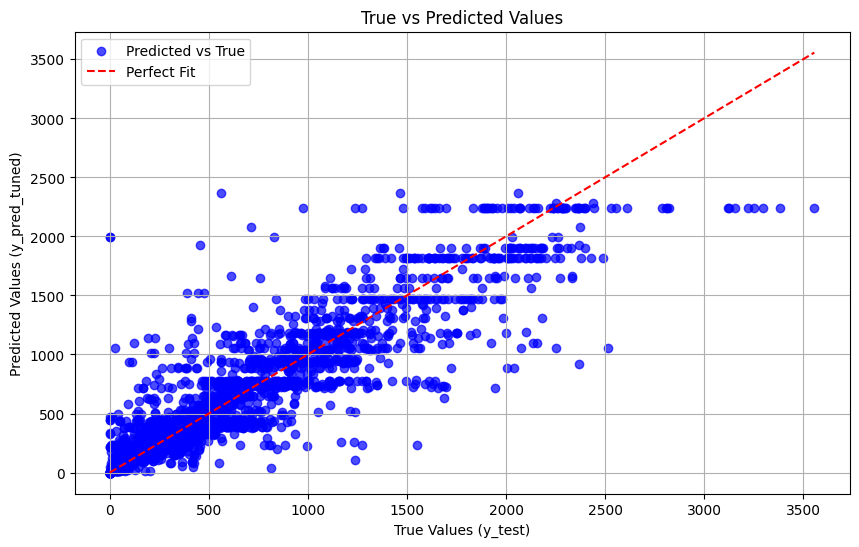

In [162]:
import matplotlib.pyplot as plt
import pandas as pd

# Visualizing y_test vs y_pred_tuned
plt.figure(figsize=(10, 6))

# Scatter plot of true vs predicted values
plt.scatter(y_test, y_pred_tuned, alpha=0.7, label='Predicted vs True', color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit')  # Reference line

# Adding labels and title
plt.title('True vs Predicted Values')
plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (y_pred_tuned)')
plt.legend()
plt.grid(True)
plt.show()


### Bagging Regressor

In [163]:


# Initialize the Bagging Regressor
bagging_model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)

# Train the model
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred_bagging = bagging_model.predict(X_test)

# Evaluate the model

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred_bagging)
print("Mean Squared Error (MSE) of Bagging Regressor:", mse)

# R^2 Score
r2 = r2_score(y_test, y_pred_bagging)
print("R2 Score of Bagging Regressor:", r2)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_bagging)
print("Mean Absolute Error (MAE) of Bagging Regressor:", mae)


Mean Squared Error (MSE) of Bagging Regressor: 36891.33825106164
R2 Score of Bagging Regressor: 0.8942402815500632
Mean Absolute Error (MAE) of Bagging Regressor: 114.31435958904109


### Gradient Boosting Regressor

In [164]:


# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred_gb)
print("Mean Squared Error (MSE) of Gradient Boosting Regressor:", mse)

# R^2 Score
r2 = r2_score(y_test, y_pred_gb)
print("R2 Score of Gradient Boosting Regressor:", r2)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_gb)
print("Mean Absolute Error (MAE) of Gradient Boosting Regressor:", mae)


Mean Squared Error (MSE) of Gradient Boosting Regressor: 51764.93302046406
R2 Score of Gradient Boosting Regressor: 0.8516008092586187
Mean Absolute Error (MAE) of Gradient Boosting Regressor: 149.38796672680363


### Esembling

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
import xgboost as xgb
import lightgbm as lgb

In [165]:

# Models dictionary
models = {
    "Linear Model (LM)": LinearRegression(),
    
    "Gradient Boosting Machine (GBM)": lgb.LGBMRegressor(random_state=42),
    "Support Vector Machine (SVM)": SVR(),
    "Bagging Regressor (BR)": BaggingRegressor(n_estimators=100, random_state=42),
    "Bagging Tree (BT)": RandomForestRegressor(n_estimators=100, random_state=42),
    "Extreme Gradient Boosting (XGBTree)": xgb.XGBRegressor(random_state=42)
}

# Cross-validation (CV) and evaluation functions
def evaluate_model(model, X, y):
    # Cross-validation scores
    mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mae_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    
    # Average performance metrics
    mse = -np.mean(mse_scores)
    mae = -np.mean(mae_scores)
    r2 = np.mean(r2_scores)
    
    return mse, mae, r2

# Apply models and collect evaluation results
results = {}
for name, model in models.items():
    mse, mae, r2 = evaluate_model(model, X_train, y_train)
    results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

# Create a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

# Apply Voting Regressor (Ensembling) with the individual models
voting_model = VotingRegressor(estimators=[(name, model) for name, model in models.items()])

# Evaluate the ensemble model
mse_voting, mae_voting, r2_voting = evaluate_model(voting_model, X_train, y_train)
print("\nEnsemble Model (Voting Regressor) Performance:")
print(f"MSE: {mse_voting}, MAE: {mae_voting}, R2: {r2_voting}")

# Assign weights based on R2 (or any other metric)
weights = results_df['R2'] / results_df['R2'].sum()

# Weighted average prediction using the models' predictions
predictions = np.zeros((X_train.shape[0], len(models)))

# Collect predictions for each model
for i, (name, model) in enumerate(models.items()):
    predictions[:, i] = cross_val_predict(model, X_train, y_train, cv=5)

# Weighted average of the predictions
ensemble_pred = np.dot(predictions, weights)

# Calculate MSE, MAE, R2 for the weighted predictions
ensemble_mse = mean_squared_error(y_train, ensemble_pred)
ensemble_mae = mean_absolute_error(y_train, ensemble_pred)
ensemble_r2 = r2_score(y_train, ensemble_pred)




[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000886 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3565
[LightGBM] [Info] Number of data points in the train set: 7008, number of used features: 23
[LightGBM] [Info] Start training from score 603.158818
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000983 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3564
[LightGBM] [Info] Number of data points in the train set: 7008, number of used features: 23
[LightGBM] [Info] Start training from score 611.759989
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001000 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3561
[LightGBM] [Info] Number of data points in the train set: 7008, number of used features: 23
[LightGBM] [Info] Start tr

In [116]:
print("\nEnsemble Model (Voting Regressor) Performance:")
print(f"MSE: {mse_voting}, MAE: {mae_voting}, R2: {r2_voting}")


Ensemble Model (Voting Regressor) Performance:
MSE: 0.003857438531093689, MAE: 0.04057125994857513, R2: 0.8657940248563959


In [117]:
print("\nEnsemble Model (Weighted Average) Performance:")
print(f"MSE: {ensemble_mse}, MAE: {ensemble_mae}, R2: {ensemble_r2}")



Ensemble Model (Weighted Average) Performance:
MSE: 0.0035764350354309435, MAE: 0.03842378819115587, R2: 0.8756736149148001


In [38]:
# Define the neural network
nn_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  # First hidden layer
    Dense(32, activation='relu'),                             # Second hidden layer
    Dense(1)                                                  # Output layer
])

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# Train the model
nn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)


c:\Users\Shokoufeh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.3180
Epoch 2/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0136
Epoch 3/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0110
Epoch 4/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0107
Epoch 5/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0096
Epoch 6/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0088
Epoch 7/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0088
Epoch 8/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0081
Epoch 9/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0091
Epoch 10/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0073
Epoch 11/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0081
Epoch 12/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0070
Epoch 13/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0071
Epoch 14/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0080
Epoch 15/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

In [43]:
# Predict on test data
y_pred_nn = nn_model.predict(X_test)

# Evaluate the model

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred_nn)
print("Mean Squared Error (MSE) of Neural Network:", mse)

# R^2 Score
r2 = r2_score(y_test, y_pred_nn)
print("R2 Score of Neural Network:", r2)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_nn)
print("Mean Absolute Error (MAE) of Neural Network:", mae)

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Squared Error (MSE) of Neural Network: 0.006703971382927761
R2 Score of Neural Network: 0.7569746750019702
Mean Absolute Error (MAE) of Neural Network: 0.056091539904671875
